In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context()

In [2]:
data=pd.read_csv('customers.csv')
df=data.drop(['Channel','Region'],axis=1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [3]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler= MinMaxScaler()
scaled= scaler.fit_transform(df)

In [6]:
df=pd.DataFrame(scaled,columns=df.columns)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [7]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans1=KMeans(n_clusters=5, random_state=25)


In [10]:
kmeans1.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=25, tol=0.0001, verbose=0)

In [11]:
pred=data.drop(['Channel','Region'],axis=1)
pred['kmean-clusters']=kmeans1.labels_

In [12]:
pred.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,kmean-clusters
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,4


In [13]:
 pred['kmean-clusters'].value_counts()

1    279
3     93
4     55
0     10
2      3
Name: kmean-clusters, dtype: int64

# Finding optimum number of clusters through Elbow method

In [14]:
cost = []
for k in range(1, 15):
    kmeanModel = KMeans(n_clusters=k, random_state=25).fit(df)
    cost.append([k,kmeanModel.inertia_])

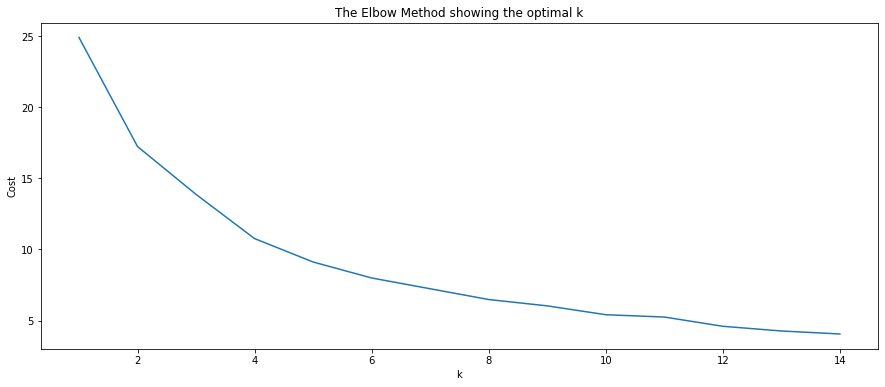

In [15]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(cost)[0], pd.DataFrame(cost)[1])
plt.xlabel('k')
plt.ylabel('Cost')
plt.title('The Elbow Method showing the optimal k') 
plt.show()


Here the optimum cluster is at 2

# Now finding it through SILHOUTTE SCORE

In [16]:
from sklearn.metrics import silhouette_score

In [18]:
s_score = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=25).fit(df)
    s_score.append([k, silhouette_score(df, kmeans.labels_)])

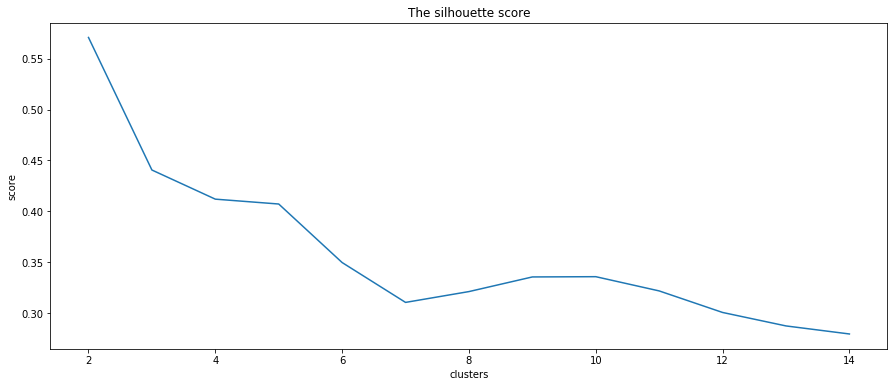

In [19]:
plt.figure(figsize=(15,6))
plt.plot( pd.DataFrame(s_score)[0], pd.DataFrame(s_score)[1])
plt.xlabel('clusters')
plt.ylabel('score')
plt.title('The silhouette score') 
plt.show()

In [20]:
kmeans2=KMeans(n_clusters=2,random_state=25 )
kmeans2.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=25, tol=0.0001, verbose=0)

In [21]:
pred['optimum-clusters']=kmeans2.labels_

In [22]:
pred.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,kmean-clusters,optimum-clusters
0,12669,9656,7561,214,2674,1338,1,0
1,7057,9810,9568,1762,3293,1776,1,0
2,6353,8808,7684,2405,3516,7844,1,0
3,13265,1196,4221,6404,507,1788,1,0
4,22615,5410,7198,3915,1777,5185,4,0


In [23]:
pred['optimum-clusters'].value_counts()

0    393
1     47
Name: optimum-clusters, dtype: int64

# Hierarchial Clustering

In [24]:
df_hr=pd.read_csv('114_congress.csv')
df_hr.head()

,name,party,state,Bill_1,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,Bill_10,Bill_20,Bill_26,Bill_32,Bill_38,Bill_39,Bill_44,Bill_47
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [25]:
df_hr.set_index('name',inplace=True)
df_hr.head()

,party,state,Bill_1,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,Bill_10,Bill_20,Bill_26,Bill_32,Bill_38,Bill_39,Bill_44,Bill_47
name,,,,,,,,,,,,,,,,,
Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [26]:
X=df_hr.drop(['party','state'],axis=1)
Y=df_hr['party']

In [27]:
X.head()

,Bill_1,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,Bill_10,Bill_20,Bill_26,Bill_32,Bill_38,Bill_39,Bill_44,Bill_47
name,,,,,,,,,,,,,,,
Alexander,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Ayotte,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
Baldwin,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
Barrasso,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
Bennet,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [28]:
Y.head()

name
Alexander    R
Ayotte       R
Baldwin      D
Barrasso     R
Bennet       D
Name: party, dtype: object

In [29]:
from sklearn.cluster import AgglomerativeClustering

In [30]:
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(X)

In [31]:
# Hierarchical clustering using complete linkage
complete = AgglomerativeClustering(n_clusters=3, linkage="complete")

complete_pred = complete.fit_predict(X)


# Hierarchical clustering using average linkage

avg = AgglomerativeClustering(n_clusters=3, linkage="average")

avg_pred = avg.fit_predict(X)

In [34]:
from sklearn.metrics import adjusted_rand_score

ward_ar_score = adjusted_rand_score(Y, ward_pred)

In [36]:
# Write the code to calculate the adjusted Rand score for the complete linkage clustering labels
complete_ar_score = adjusted_rand_score(Y, complete_pred)

# Write the code to calculate the adjusted Rand score for the average linkage clustering labels
avg_ar_score = adjusted_rand_score(Y, avg_pred)

In [37]:
print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.8110199642721615 
Complete:  0.8944016485750291 
Average:  0.8944016485750291


In [38]:
complete_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [39]:
print(pd.crosstab(complete_pred, df_hr["party"]))

party   D  I   R
row_0           
0       1  0  54
1      41  2   0
2       2  0   0


In [40]:
df_hr["party"].value_counts()

R    54
D    44
I     2
Name: party, dtype: int64

In [41]:
unique1, counts = np.unique(complete_pred, return_counts=True)

In [42]:
dict(zip(unique1, counts))

{0: 55, 1: 43, 2: 2}

# Dendrogram visualization with scipy

In [43]:
# Import scipy's linkage function to conduct the clustering
from scipy.cluster.hierarchy import linkage

linkage_type = 'complete'

linkage_matrix = linkage(X, linkage_type)

In [44]:
from scipy.cluster.hierarchy import dendrogram

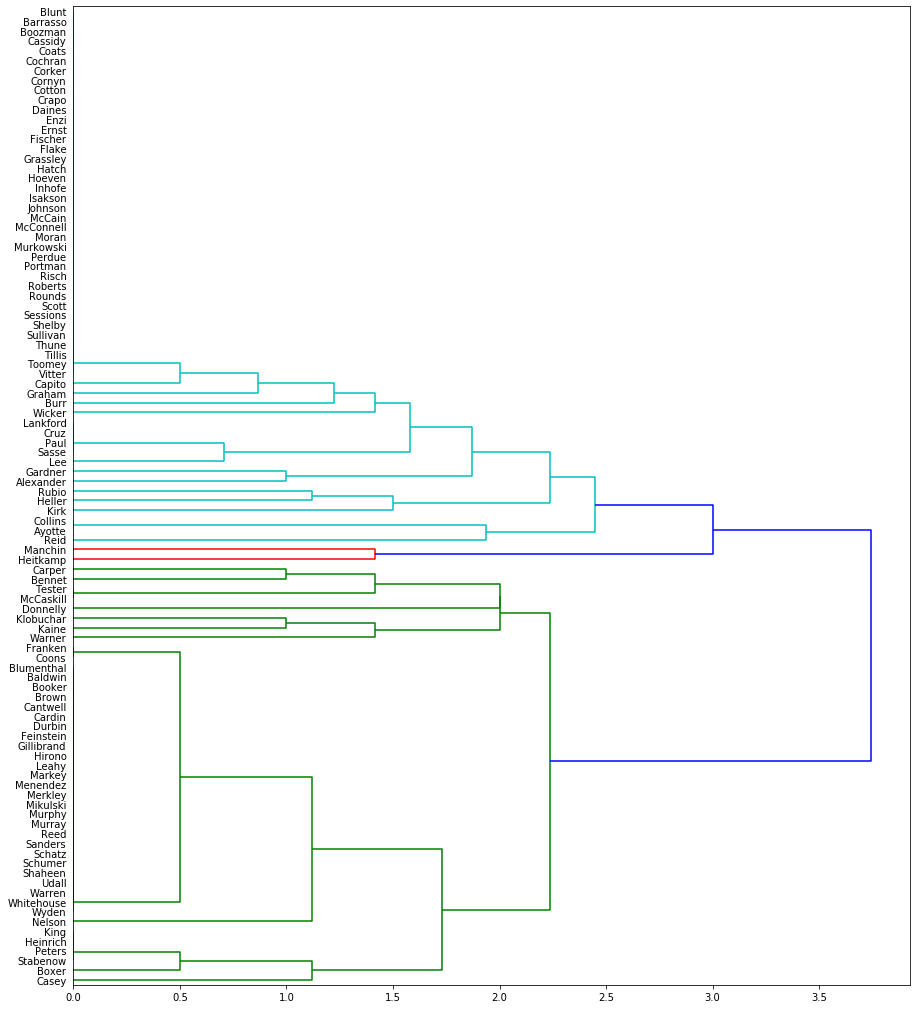

In [45]:
plt.figure(figsize=(15,18))
sns.set_context()
dendrogram(linkage_matrix, leaf_font_size=10, labels=X.index,orientation="right" )
plt.show()

## Visualization with Seaborn's clustermap
The seaborn plotting library for python can plot a clustermap, which is a detailed dendrogram which also visualizes the dataset in more detail. It conducts the clustering as well, so we only need to pass it the dataset and the linkage type we want, and it will use scipy internally to conduct the clustering

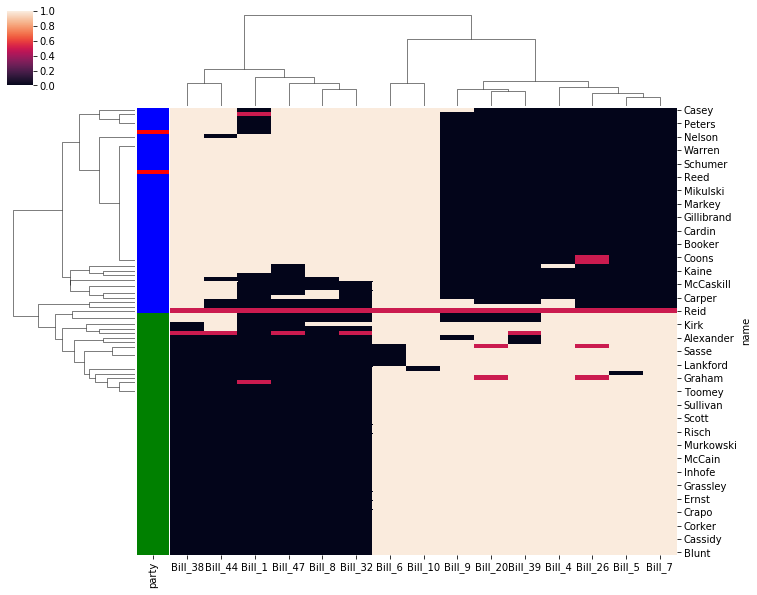

In [46]:
colour={'I':'r','R':'g','D':'b'}
row_colors = Y.map(colour)
sns.clustermap(X, row_colors=row_colors, figsize=(12,10),method='complete')
plt.show()


# Important Articles

https://towardsdatascience.com/hierarchical-clustering-and-its-applications-41c1ad4441a6

https://blogs.oracle.com/datascience/introduction-to-k-means-clustering

https://towardsdatascience.com/unsupervised-learning-k-means-vs-hierarchical-clustering-5fe2da7c9554